#  Diabetes Prediction Using Classification Models

In [873]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler
import numpy as np
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay
from IPython.display import Latex

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
pip install IpYTHON

# Understanding Data

* The objective of the dataset is to diagnostically predict **whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset.
* The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Here is the description of each variable :
    * **Pregnancies:** Number of times pregnant    * **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    * **BloodPressure:** Diastolic blood pressure (mm Hg)
    * **SkinThickness:** Triceps skin fold thickness (mm)
    * **Insulin:** 2-Hour serum insulin (mu U/ml)
    * **BMI:** Body mass index (weight in kg/(height in m)^2)
    * **DiabetesPedigreeFunction:** Diabetes pedigree function
    * **Age:** Age (years)
    * **Outcome:** Class variable (0 or 1)value 1 is interpreted as "tested positive for
diabetes")

In [465]:
#Loading the dataset
diab_data = pd.read_csv('./diabetes.csv')

#Print the first 5 rows of the dataframe.
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 📈 Data Analysis :

In [252]:
diab_data.shape

(768, 9)

In [254]:
diab_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### cheking missing values

Now, we can see that we have no missing values :

In [258]:
# Missing values for all attributes
diab_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



**The Distribution of the outcome**

* We observe in the plot below that the number of patients not suffering from diabetes is twice of the Diabetec patients
* So our dataset is Not Balanced.

In [262]:
print("teh distribution of the outcome in the dataset",diab_data['Outcome'].value_counts())

teh distribution of the outcome in the dataset Outcome
0    500
1    268
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of the Outcome'}, xlabel='Outcome', ylabel='count'>

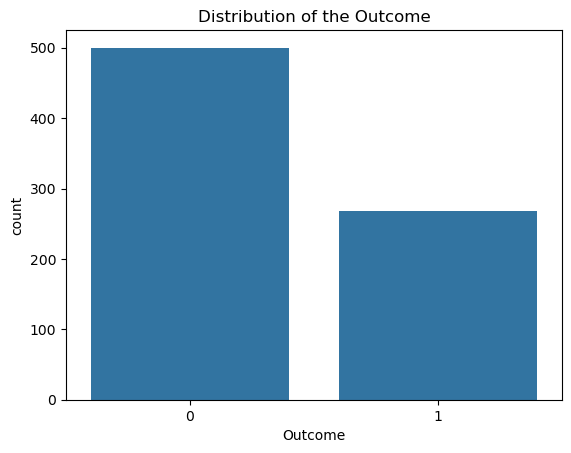

In [264]:
plt.title('Distribution of the Outcome')
sns.countplot(x='Outcome',data=diab_data)

**Descriptive statistics of the dataset**

In [266]:
diab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **Visualisation of the distribition of the variables**

**Distribution of Pregnancies**
 * By looking at the Above Plot We Observe **Distribution de Pregnancies Variable** Values are Right Skewed.
 * most values concentrated between 0 and 5.

**Distribution of Glucose**
 *  We Observe that Glucose Variable Value are left Skewed and Major values are Accumulated between 75 to 150.

**Distribution of BloodPressure**
 * The distribution shows a normal-like bell curve, centered around 60 to 85, with fewer individuals having extreme values (<40 or >100).
 * This reflects common blood pressure ranges, with outliers possibly indicating abnormal health conditions (hypotension or hypertension).

**Distribution of SkinThinkness**
 * We Observe SkinThickness Variable Values are Right Skewed.

**Distribution of insulin**
 * We Observe Insulin Variable Values are Right Skewed.
 * most values concentrated between 0 and 200.
 * A small number of extreme outliers exist beyond 300, likely representing individuals with abnormal insulin levels 

**Distribution of BMI**
 * The distribution appears approximately normal, centered around 30, with most values falling between 20 and 40.
 * BMI values > 40 indicate obesity, while those <18.5 might suggest underweight individuals.

**DIstribution of DiabetesPedigreeFunction**
 * The pedigree function measures genetic predisposition to diabetes
 * This variable is right-skewed, with most values concentrated between 0.0 and 1.0.
 * Higher values (>1.5) likely represent a smaller proportion of individuals with a strong familial history of diabetes.



 **From the data we notice that there is some skewness and some columns like skin thickness, glucose, insulin, BMI. at 0...which is clearly not possible**


 
 **All these entries are null entries and thus needed to be treated like null values**


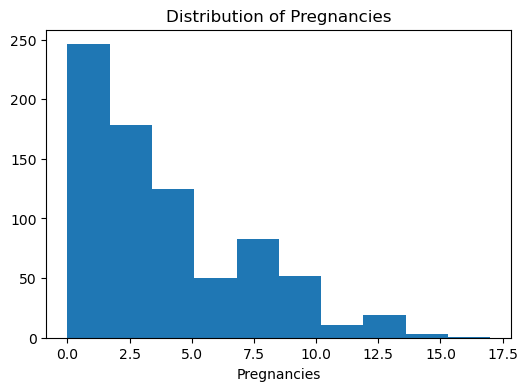

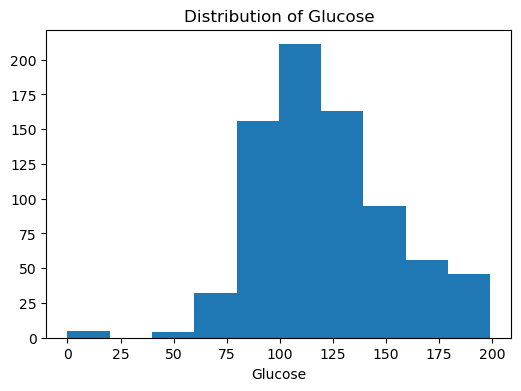

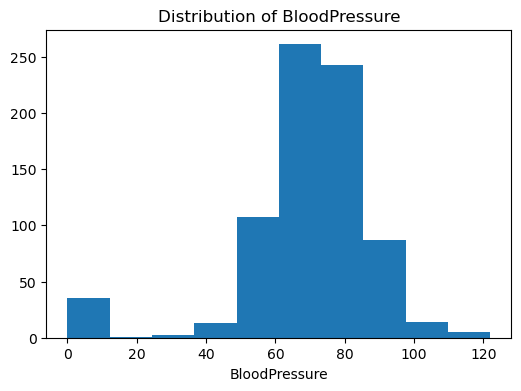

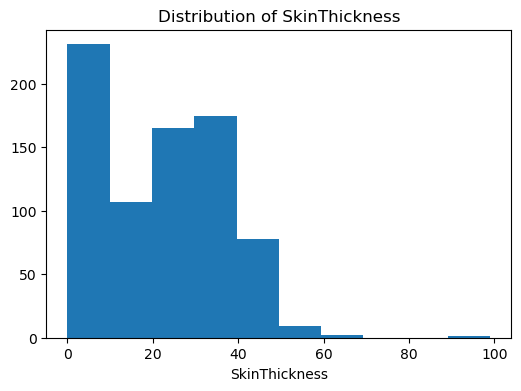

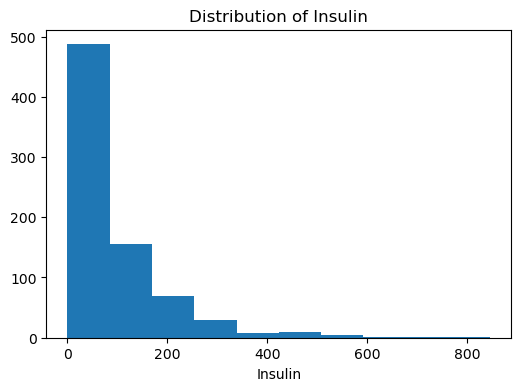

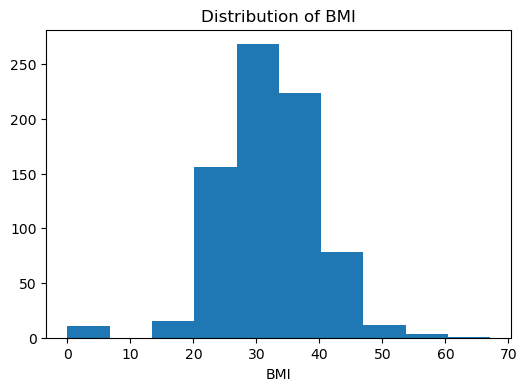

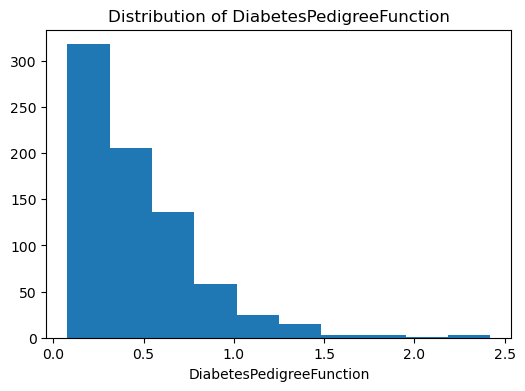

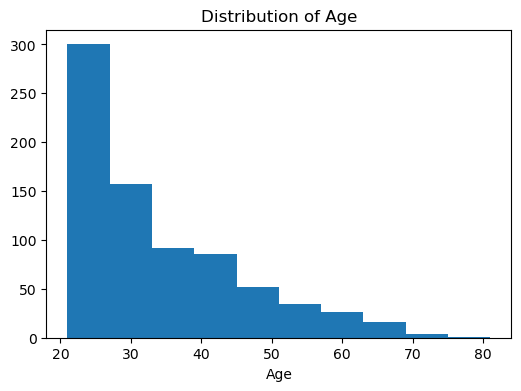

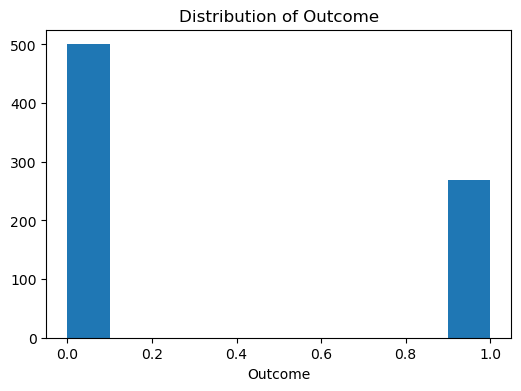

In [225]:
for col in diab_data:
    plt.figure(figsize=(6, 4))
    plt.hist(data=diab_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

In [268]:
diab_data.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


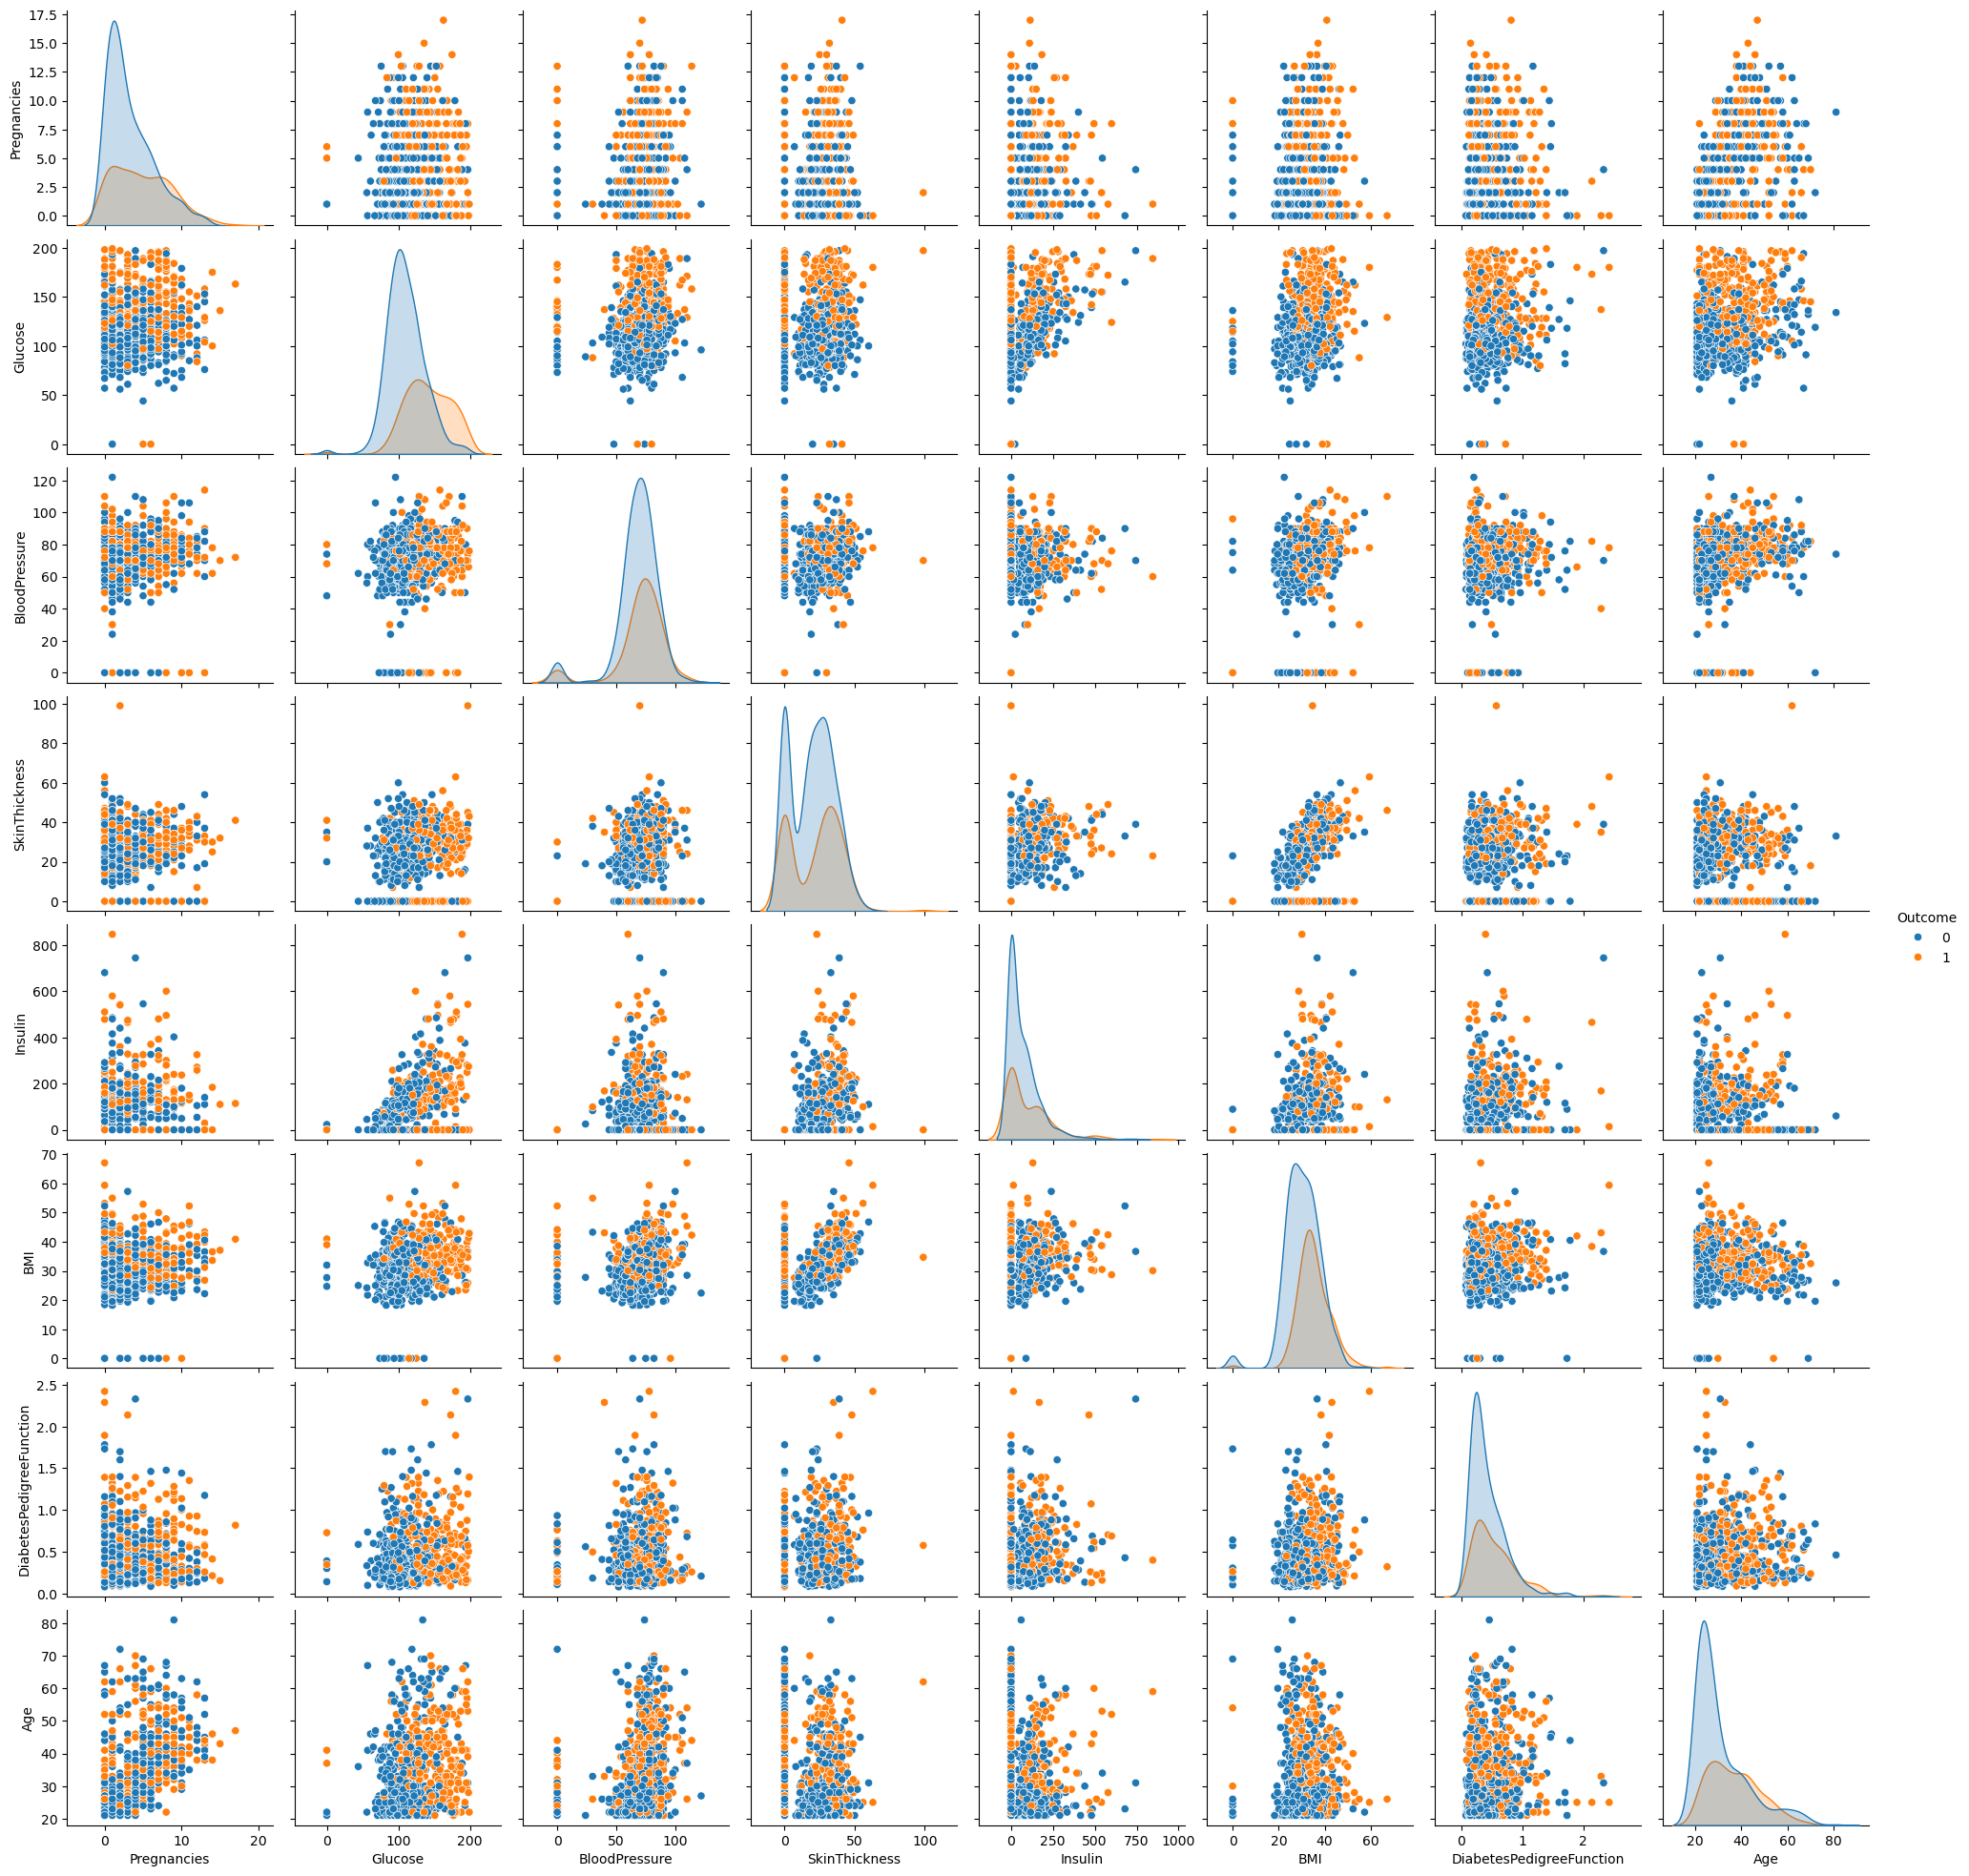

In [270]:
sns.pairplot(diab_data,hue='Outcome')

# Correlation matrix


From the above correlation matrix, we can see that there are 2 pairs of features that has a correlation value of above 0.6.

They are:
  * Pregnancies and Age with a correlation value of 0.54
   * There is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features
   * Glucose and Insulin (correlation of 0.44)


The folowwing variables may be excluded from prediction model:
 * Pregnancies: It's high correlated with age and low related with outcome (y).
 * SkinThickness: It's high correlated with BMI and low related with outcome (y).
 * Insulin: It's high correlated with Glucose and low related with outcome (y).
 * BloodPressure: It's low related with outcome (y).
 * DiabetesPedigreeFunction: It's low related with outcome (y).


**From this, All the features hold very little correlation amongst each other. Only age and pregnancies shows a significant strong correlation. Therefore, keeping the all the features.**

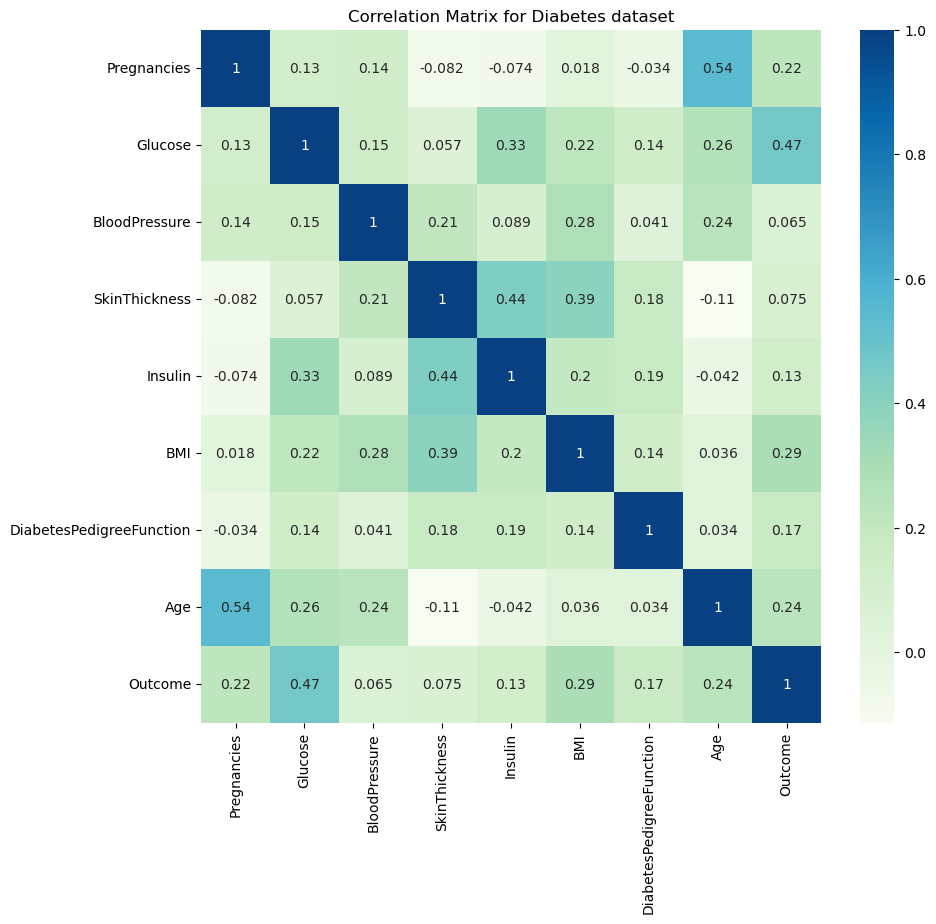

In [467]:
corr_mat = diab_data.corr()
plt.figure(figsize=(10,9))
sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.title("Correlation Matrix for Diabetes dataset")
plt.show()

# Data Preprocessing

### **Data Cleaning**

### replacing the zeros with mean in the previous selected variables

In [469]:
# replacing the 0 values with the mean 

diab_data['BMI'] =diab_data['BMI'].replace(0,diab_data['BMI'].mean())
diab_data['BloodPressure'] =diab_data['BloodPressure'].replace(0,diab_data['BloodPressure'].mean())
diab_data['Glucose'] = diab_data['Glucose'].replace(0,diab_data['Glucose'].mean())
diab_data['Insulin'] = diab_data['Insulin'].replace(0,diab_data['Insulin'].mean())
diab_data['SkinThickness'] = diab_data['SkinThickness'].replace(0,diab_data['SkinThickness'].mean())

### Encode categorical features appropriately


In [471]:
#Encode the preganncies variable
# 0 if there is no pregnancies and 1 for otyher values
diab_data['Pregnancies'] = diab_data['Pregnancies'].apply(lambda x: 0 if x == 0 else 1)



C:\Users\linam\AppData\Local\Temp\ipykernel_14924\2479683333.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data[column])
C:\Users\linam\AppData\Local\Temp\ipykernel_14924\2479683333.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data[column])
C:\Users\linam\AppData\Local\Tem

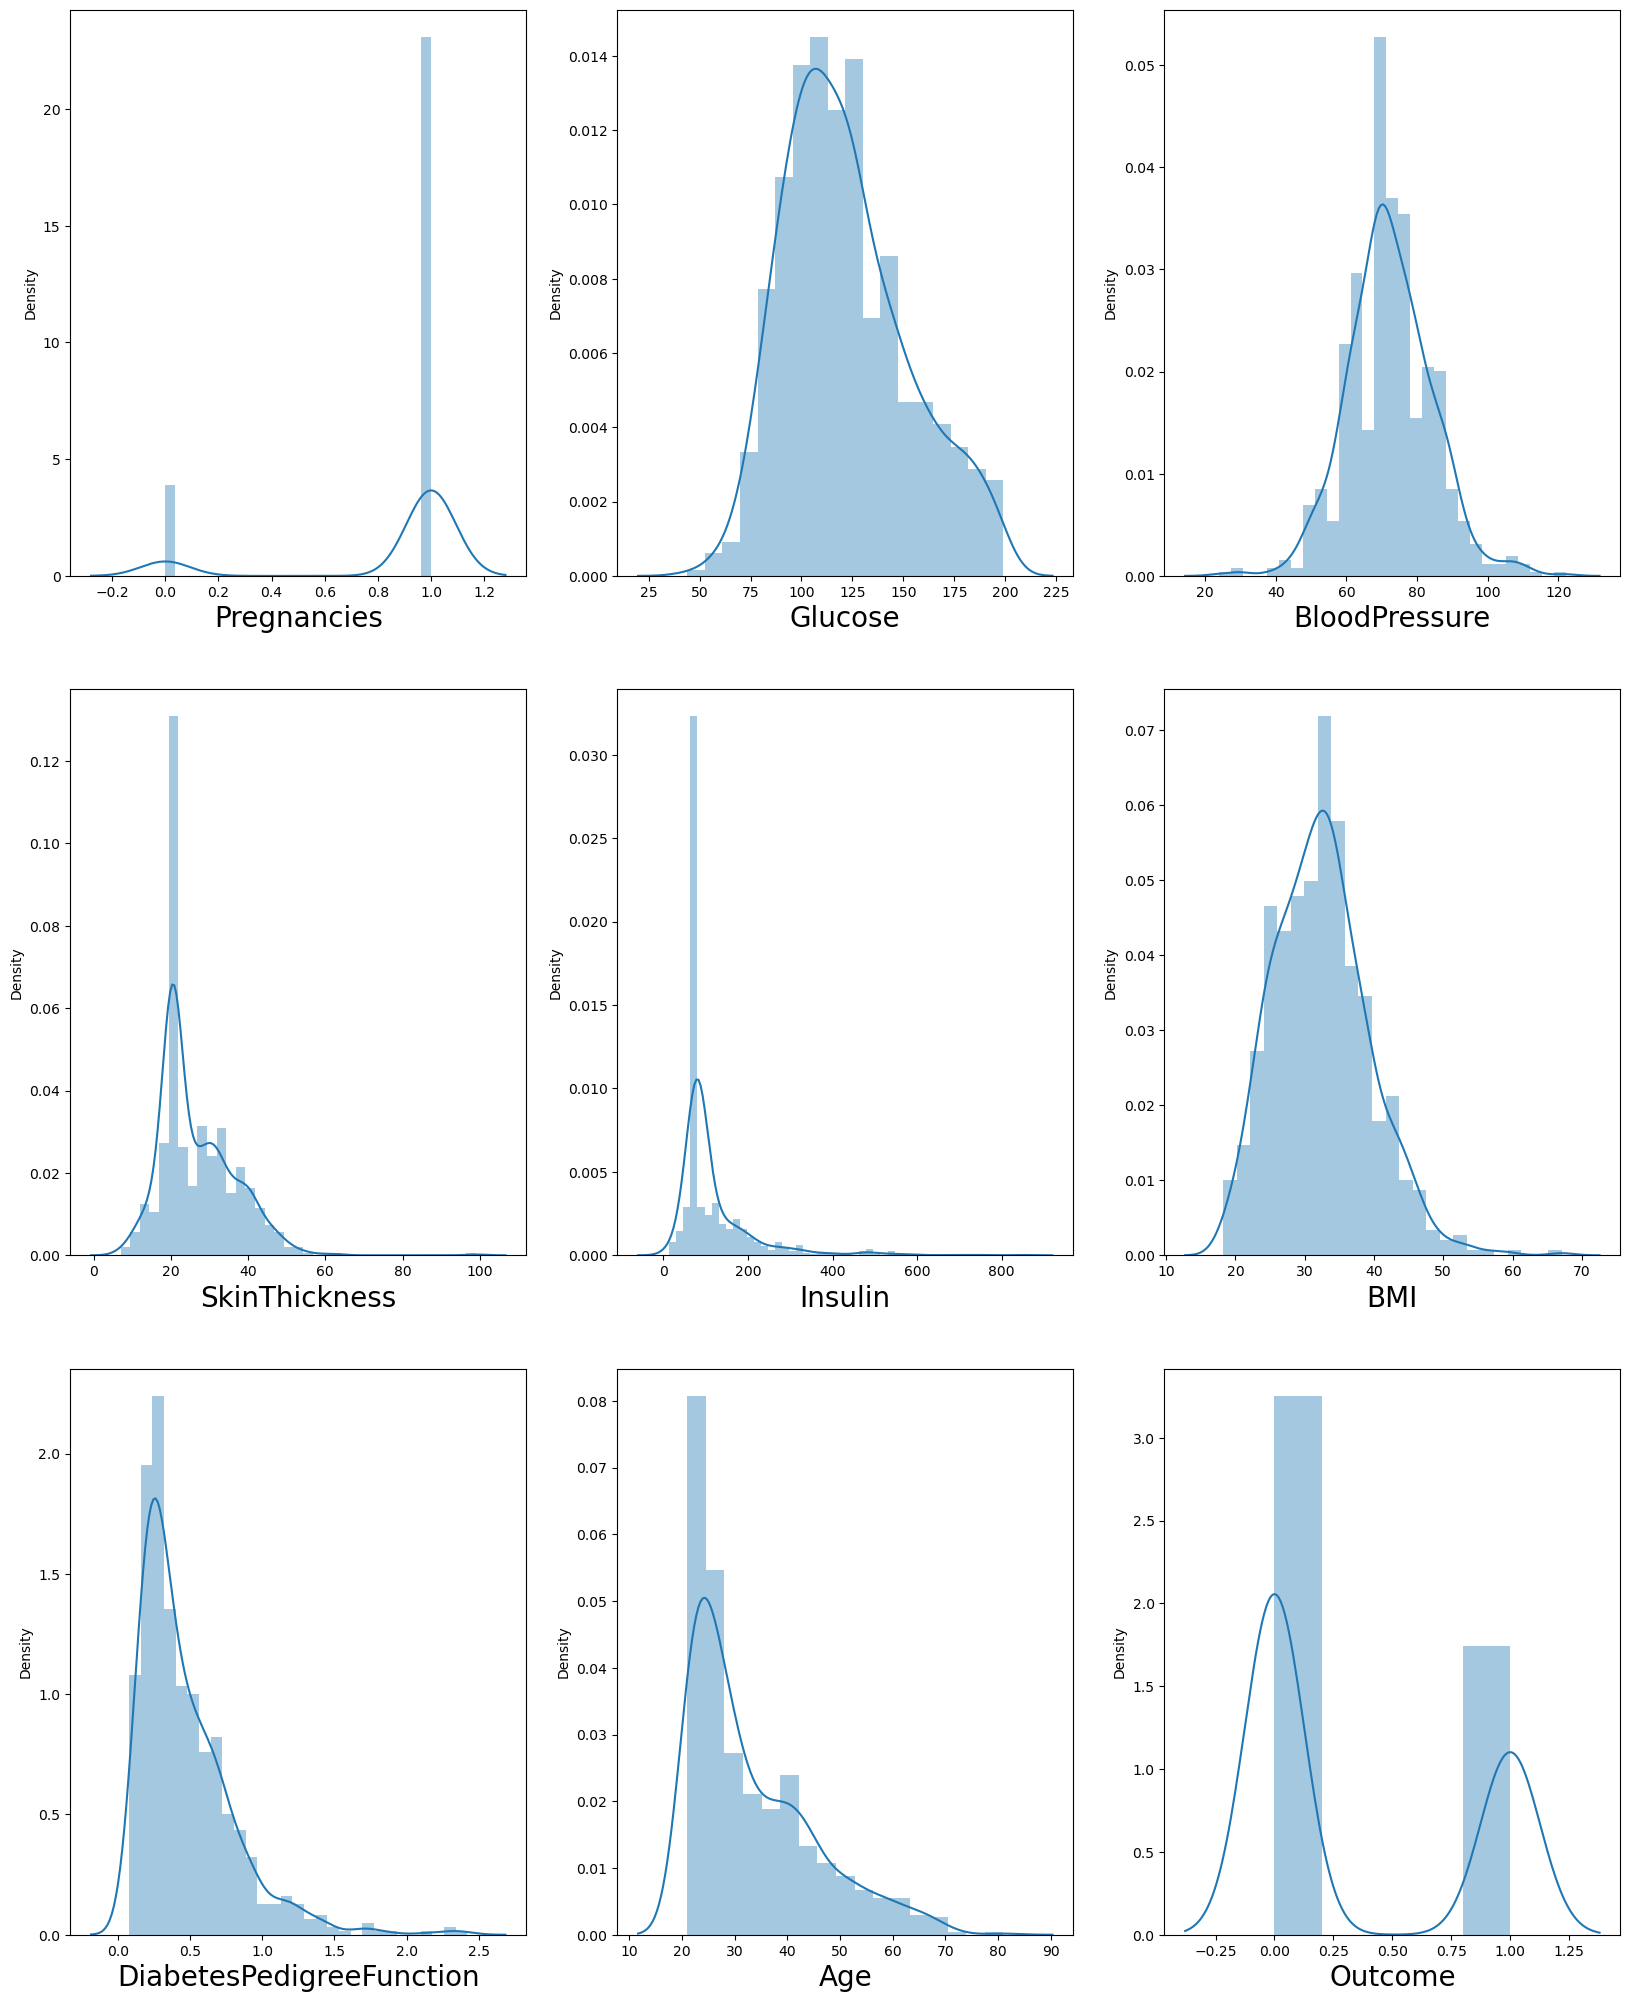

In [473]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in diab_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diab_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### **Data Transformation**

### Normalize and Standardize data

* **Standardization:** Scale values to have a mean of 0 and a standard deviation of 1. Use for features with normal or approximately normal distributions.
* **Normalization:** Scale values to a range (e.g., [0,1]). Use for features with skewed distributions.

* Notes:
    * **Pregnancies** Even though it's right-skewed, it is binary after encoding (0/1) 

In [475]:
# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Features to normalize
normalize_features = ['Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
diab_data[normalize_features] = minmax_scaler.fit_transform(diab_data[normalize_features])

# Features to standardize
standardize_features = ['Pregnancies', 'BloodPressure', 'BMI', 'Age']
diab_data[standardize_features] = standard_scaler.fit_transform(diab_data[standardize_features])

# Check the transformed dataset
print(diab_data.describe())

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count  7.680000e+02  768.000000   7.680000e+02     768.000000  768.000000   
mean   4.625929e-18    0.501172   1.156482e-17       0.213114    0.125793   
std    1.000652e+00    0.196361   1.000652e+00       0.104687    0.111875   
min   -2.432883e+00    0.000000  -3.985352e+00       0.000000    0.000000   
25%    4.110350e-01    0.359677  -6.817623e-01       0.147135    0.079086   
50%    4.110350e-01    0.470968  -2.104440e-02       0.173913    0.079086   
75%    4.110350e-01    0.620968   6.396735e-01       0.271739    0.136118   
max    4.110350e-01    1.000000   4.108443e+00       1.000000    1.000000   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02                768.000000  7.680000e+02  768.000000  
mean  -3.168762e-16                  0.168179  1.931325e-16    0.348958  
std    1.000652e+00                  0.141473  1.000652e+00    0.476951  
min   -2.0

### Show the distributtion after normalization

C:\Users\linam\AppData\Local\Temp\ipykernel_14924\2479683333.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data[column])
C:\Users\linam\AppData\Local\Temp\ipykernel_14924\2479683333.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data[column])
C:\Users\linam\AppData\Local\Tem

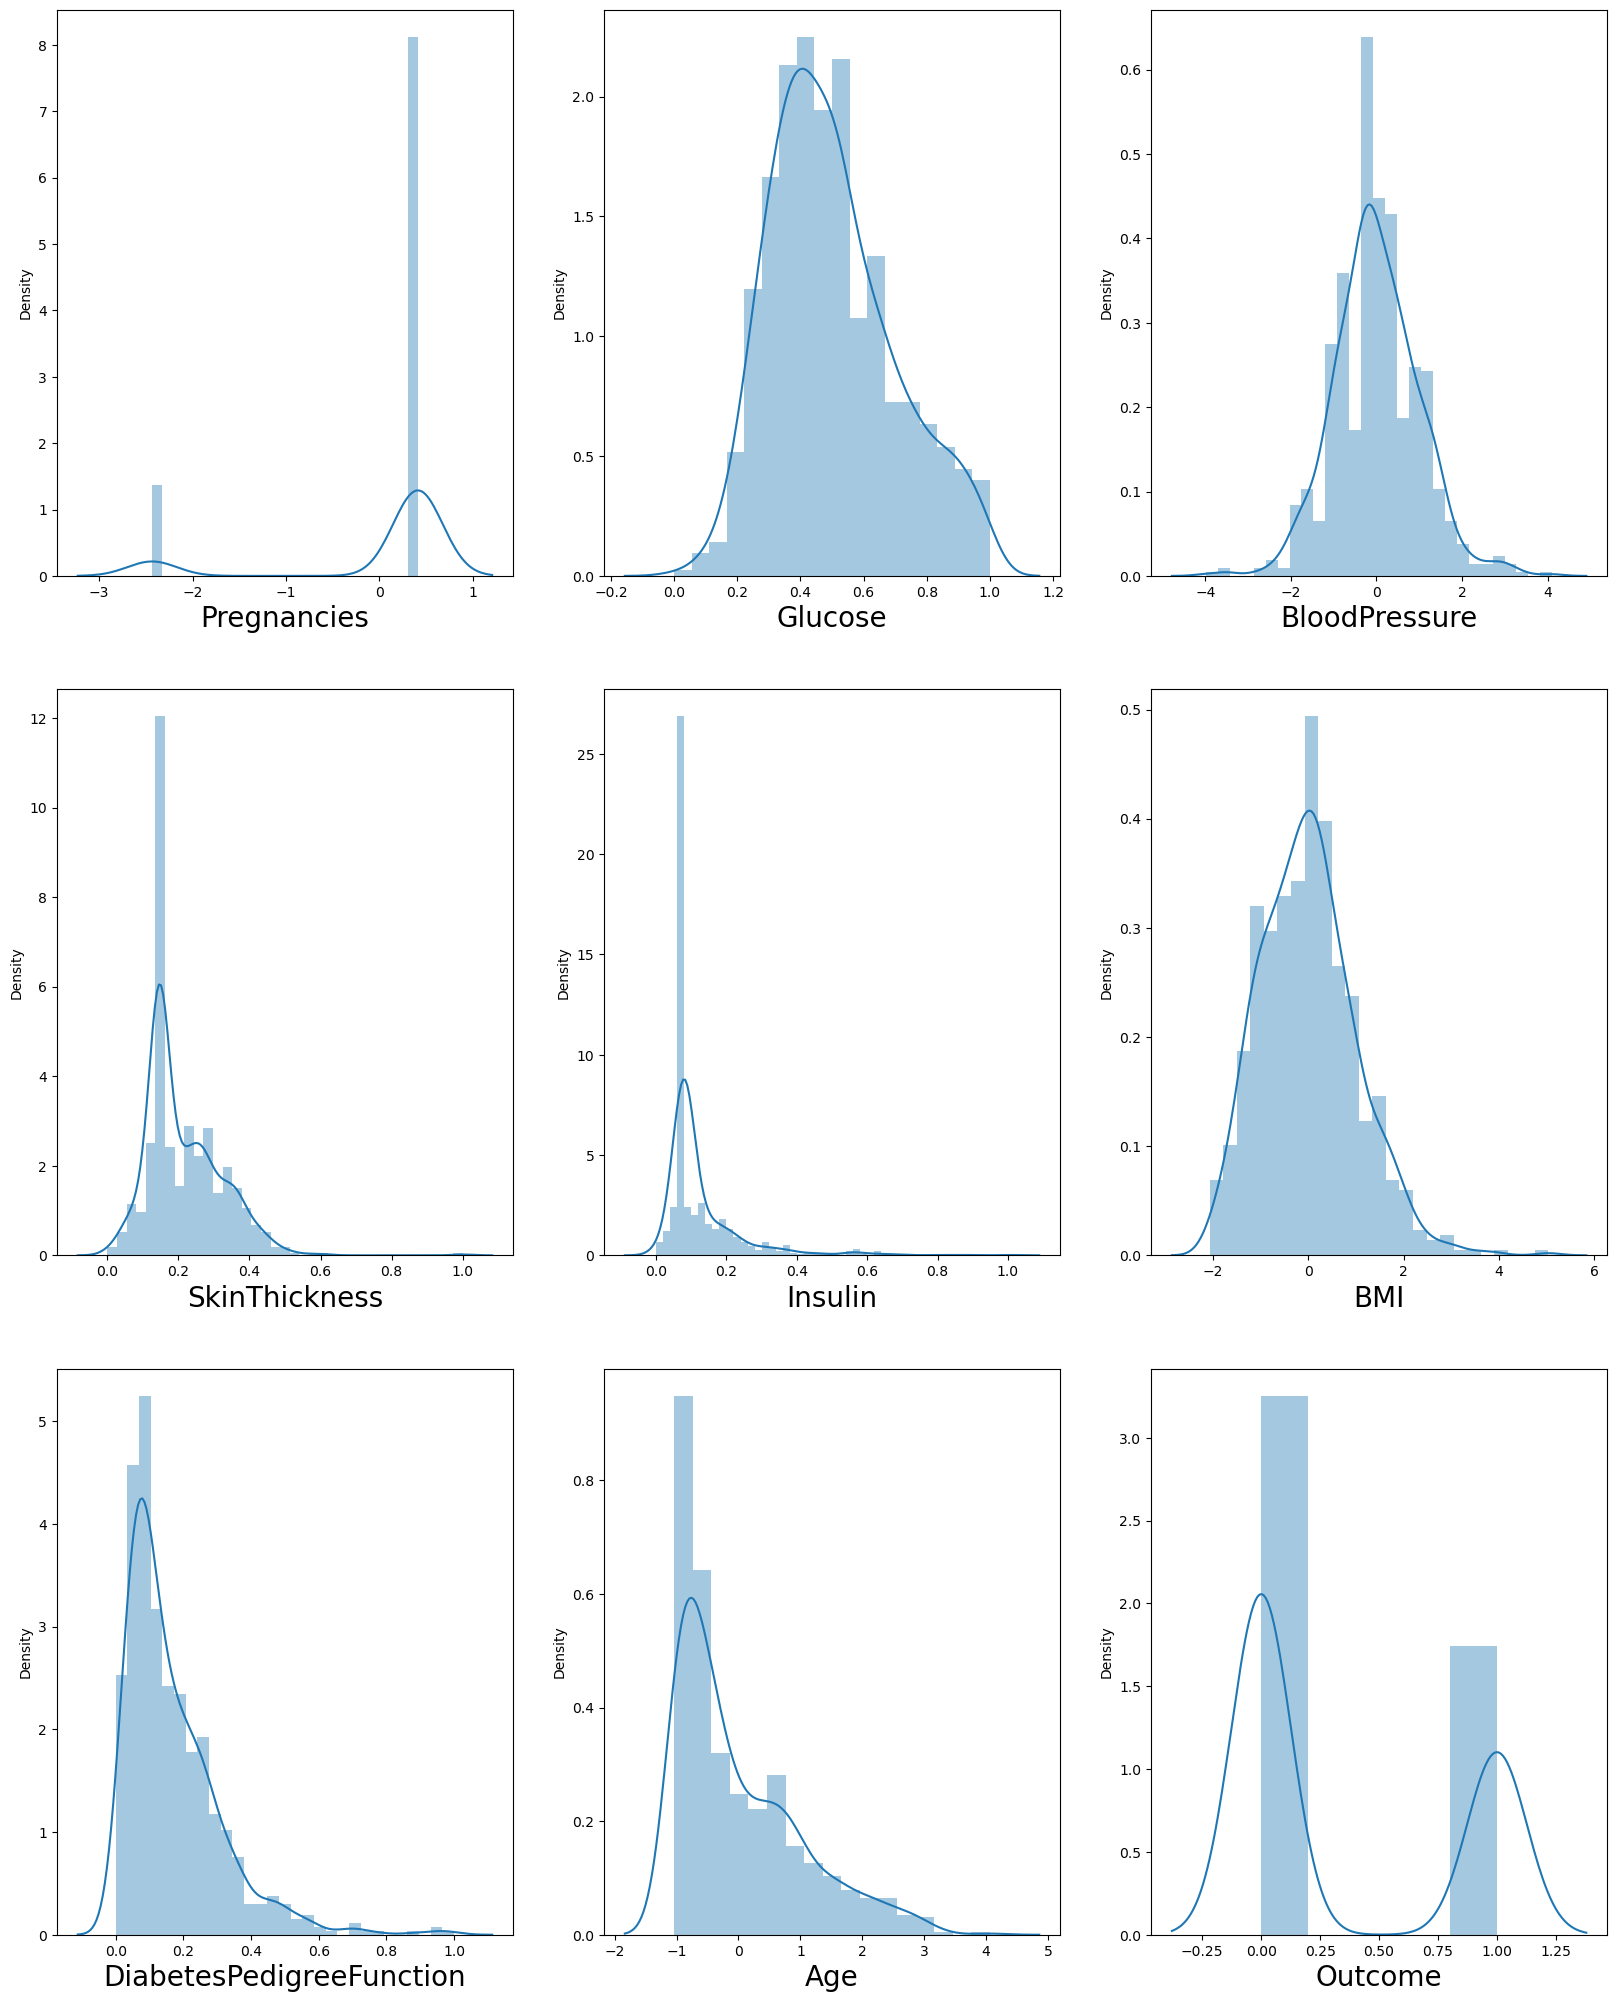

In [477]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in diab_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diab_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Correlation matrix


From the above correlation matrix, we can see that there are 2 pairs of features that has a correlation value of above 0.6.

They are:

  * BMI and SkinThickness are highly correlated 0.54
 * Glucose and Insulin (correlation of 0.4)

  * Pregnancies and Age with a correlation value of 0.2
   * There is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features


The folowwing variables may be excluded from prediction model:
 * Pregnancies: It's high correlated with age and low related with outcome (y).
 * SkinThickness: It's high correlated with BMI and low related with outcome (y).
 * Insulin: It's high correlated with Glucose and low related with outcome (y).
 * BloodPressure: It's low related with outcome (y).
 * DiabetesPedigreeFunction: It's low related with outcome (y).


**From this, All the features hold very little correlation amongst each other. Only age and pregnancies shows a significant strong correlation. Therefore, keeping the all the features.**

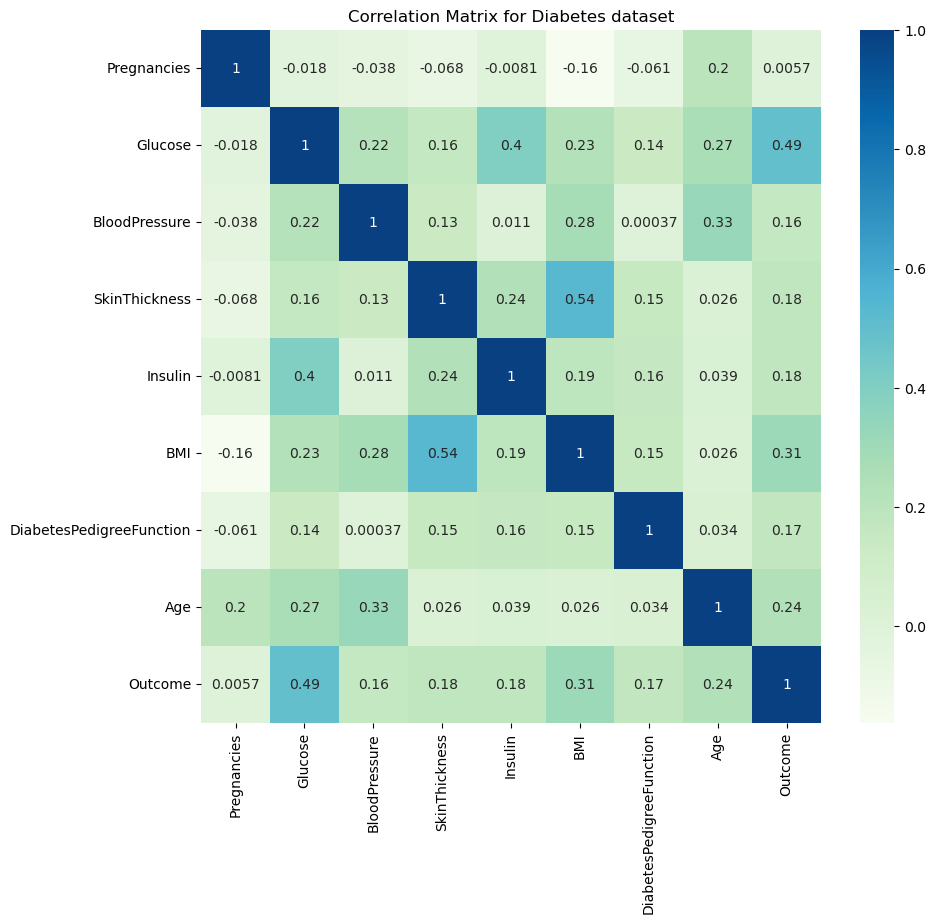

In [479]:
corr_mat = diab_data.corr()
plt.figure(figsize=(10,9))
sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.title("Correlation Matrix for Diabetes dataset")
plt.show()

### **Data Reduction - Principal Component Analysis**

**Principal Component Analysis** is an unsupervised machine learning algorithm for reducing the dimensionality of the dataset, It works by projecting the original dataset into a lower-dimensional space.

In order to optimal number of reduced features, We can see that the higher the number of Principal Components retained, the higher is the variance preserved, so we can reduce our data set dimensionality from 8 columns to 4 columns, since with **4 components we are capturing 98.22% of the total variance of the dataset**

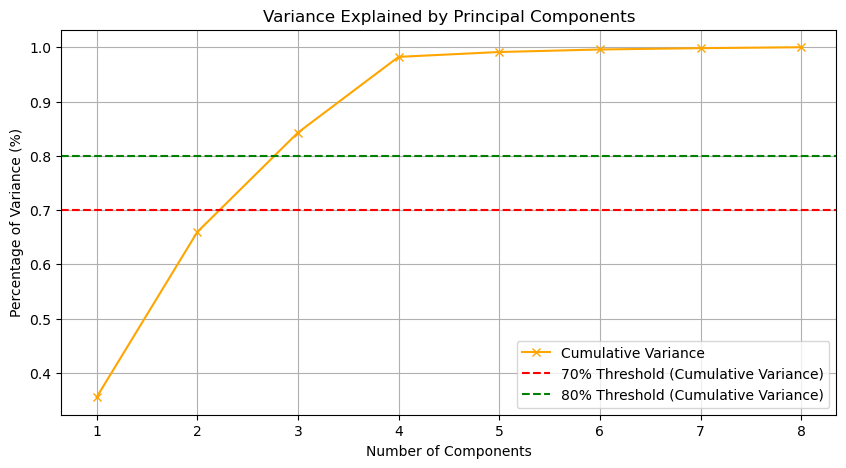

In [481]:

# Apply PCA on the normalized dataset
pca = PCA(whiten=True)
pca.fit(diab_data.drop(columns='Outcome'))  

# Explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the Scree Plot with cumulative variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='x', linestyle='-', color='orange', label='Cumulative Variance')
plt.axhline(y=0.7, color='r', linestyle='--', label="70% Threshold (Cumulative Variance)")
plt.axhline(y=0.8, color='g', linestyle='--', label="80% Threshold (Cumulative Variance)")
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance (%)')
plt.legend()
plt.grid()
plt.show()


In [483]:
print(cumulative_variance)

[0.35517939 0.65953048 0.8426455  0.98223777 0.99116942 0.99582263
 0.99827503 1.        ]


In [485]:
# Apply PCA with the selected number of components=4
pca = PCA(n_components=4)  
X_pca = pca.fit_transform(diab_data.drop(columns='Outcome'))  

# Convert the transformed data into a DataFrame for easy visualization
reduced_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

reduced_df['Outcome'] = diab_data['Outcome']

# Check the transformed data
print(reduced_df.head())

# Explained variance ratio of the selected components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")


        PC1       PC2       PC3       PC4  Outcome
0  0.850971 -0.894580  0.101196 -0.847516        1
1 -0.873434 -0.650147  0.123222  0.133085        0
2 -1.133880 -0.934365  0.433674  0.104185        1
3 -1.231563 -0.138742 -0.305420  0.573778        0
4 -1.130229  2.433634  0.081158 -2.889306        1
Explained Variance: [0.35517939 0.30435109 0.18311502 0.13959227]


# Machine learning Models

We use the **train_test_split()** function to divide our dataset into training and testing sets. The parameters include:

 *  **X:** The feature data
 * **Y:** The corresponding labels
 * **test_size:** The proportion of the dataset to include in the testing set (here, 30%)
 *  **stratify:** Ensures that the class distribution is preserved in both the training and testing sets, which is crucial for imbalanced datasets  like ours (where **'Outcome'** contains both diabetic and non-diabetic instances)
 *  **random_state:** A seed for the random number generator, ensuring reproducibility of results




In [697]:
X=reduced_df.drop(columns='Outcome')
y=reduced_df['Outcome']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [699]:
# Printing the shapes of the original, training, and testing feature sets
print(X.shape, X_train.shape, X_test.shape)

(768, 4) (537, 4) (231, 4)


# Logistic Regression (LR)

* **Type:** Linear Model
* **Use Case:** Used for binary classification problems where the output is a probability (e.g., predicting whether a person has diabetes or not).
* **Why Use:** It is simple, interpretable, and works well when there is a linear relationship between the input features and the target variable.
* **Pros:** Fast, easy to implement, good for linearly separable data.
* **Cons:** Not ideal for non-linear relationships, prone to underfitting with complex data.

Implementation of the model:
 * Regularization helps prevent overfitting by penalizing large coefficients in the model. However, excessive regularization can lead to underfitting.
 * We use the parameetr **C** in the LogisticRegression Classifier, taht controls the strength of regularization in Logistic Regression.
 * A smaller value of **C** implies stronger regularization, and larger values mean weaker regularization.
 * It trains the model with solver='newton-cg'


**Results:**
  * Based on your results, **C=1** is the best among the tested values, as it provides a reasonable balance between training and test accuracy without underfitting or overfitting

C : 1 Training set accuracy: 0.695
C : 1 Test set accuracy: 0.667
C : 1 Training set F1-score: 0.464
C : 1 Test set F1-score: 0.412


C : 0.01 Training set accuracy: 0.678
C : 0.01 Test set accuracy: 0.649
C : 0.01 Training set F1-score: 0.270
C : 0.01 Test set F1-score: 0.229


C : 100 Training set accuracy: 0.695
C : 100 Test set accuracy: 0.667
C : 100 Training set F1-score: 0.464
C : 100 Test set F1-score: 0.412




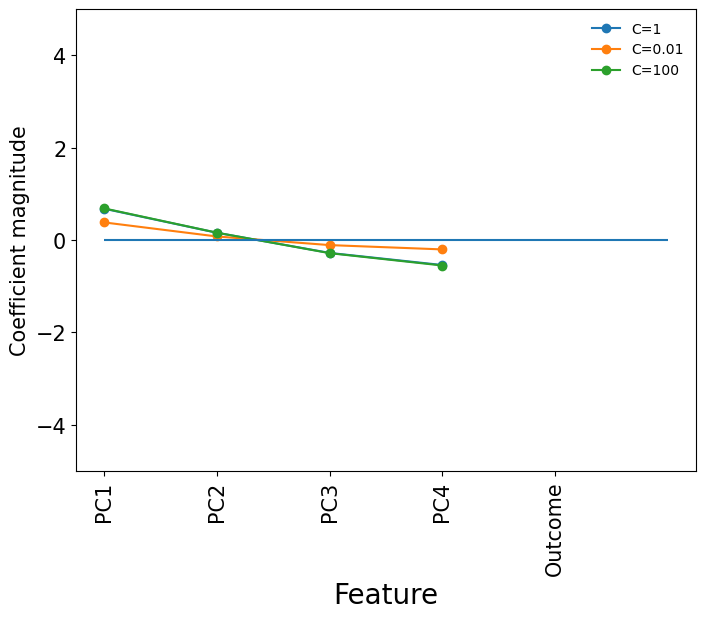

In [523]:
plt.figure(figsize=(8,6))
Clist=[1,0.01,100]

for C in Clist : 

    logreg = LogisticRegression(C=C,solver='newton-cg').fit(X_train, y_train) #keeping C=1 a
    y_train_pred = logreg.predict(X_train)
    y_pred = logreg.predict(X_test)

    print('C : {} Training set accuracy: {:.3f}'.format(C,accuracy_score(y_train, y_train_pred)))
    print('C : {} Test set accuracy: {:.3f}'.format(C,accuracy_score(y_test, y_pred)))

    print('C : {} Training set F1-score: {:.3f}'.format(C,f1_score(y_train, y_train_pred)))
    print('C : {} Test set F1-score: {:.3f}'.format(C, f1_score(y_test, y_pred)))
    print('\n')
    
    diabetes_features = [x for i,x in enumerate(reduced_df.columns) if i!=8]
    plt.plot(logreg.coef_.T, marker='o', label=f"C={C}")

plt.xticks(range(reduced_df.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, reduced_df.shape[1])
plt.ylim(-5, 5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Feature",size=20)
plt.ylabel("Coefficient magnitude",size=15)
plt.legend(frameon=False)

### **Confusion Matrix**

### **Interpretation:**

 * True Negatives (127): The model correctly predicted 127 instances of class 0 (negative outcomes).
 * False Positives (23): The model incorrectly predicted 23 instances as class 1 (positive outcomes) when they were actually class 0.
 * False Negatives (54): The model incorrectly predicted 54 instances as class 0 when they were actually class 1.
 * True Positives (27): The model correctly predicted 27 instances of class 1.

### **Conclusion**

The **confusion matrix** and **F1-scores** indicate that the model struggles with **class 1 (positive outcomes)**. This is common when **classes are imbalanced**.

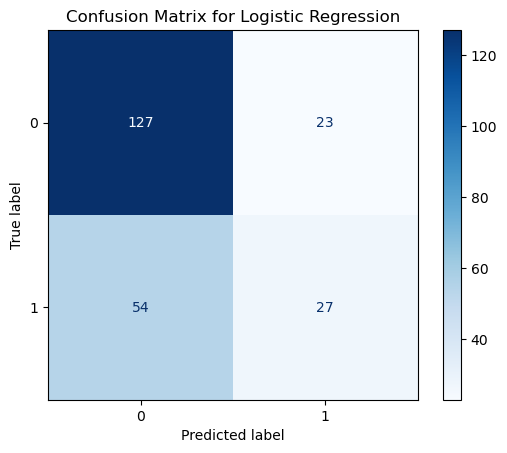

In [630]:
logreg = LogisticRegression(C=1,solver='newton-cg').fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### K-fold cross validation

* Evaluate the performance of the logistic Regression Model
* The model is trained 10 times, each time leaving out one fold as the test set
* computes the accuracy for each of the 10 folds
* computes the F1-score for each fold using the **macro-averaged F1-score**
* **macro-averaged F1-score** is a way to compute te F1-score in **imbalaced binary classificatoon**



$$
\text{F1 Macro} = \frac{1}{N} \sum_{i=1}^{N} \text{F1}_i
$$

Where:

$$
\text{F1}_i = 2 \times \frac{\text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}
$$

With:

$$
\text{Precision}_i = \frac{\text{True Positives}_i}{\text{True Positives}_i + \text{False Positives}_i}
$$

$$
\text{Recall}_i = \frac{\text{True Positives}_i}{\text{True Positives}_i + \text{False Negatives}_i}
$$


### **Interpretation**

* **Average Accuracy (69%):** Le model correctly classifies approximately **069%** of the instances on average across all folds.
* **F1-Score (61%):** The model's ability to balance precision and recall is moderate, which aligns with the earlier observation that it struggles to correctly classify the minority class (class 1).
* **Stability (Std = ±0.03):** A low standard deviation suggests the model's performance is consistent across different folds and isn't overly sensitive to variations 
 in the training data.



In [648]:
#computes the accuracy for each of the 10 folds
k_fold_logreg_accuracy = cross_val_score(logreg, X, y, cv=10) 
#computes the F1-score for each fold using the macro-averaged F1-score
#averaging F1-scores across classes equally, for evry class size
k_fold_logreg_f1 = cross_val_score(logreg, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation

k_fold_logreg_recall = cross_val_score(logreg, X, y, cv=10, scoring='recall') 
k_fold_logreg_precision = cross_val_score(logreg, X, y, cv=10, scoring='precision') ##10-fold cross validation


print(f'Average accuracy after 10 fold cross validation :{k_fold_logreg_accuracy.mean().round(2)} +/- {k_fold_logreg_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_logreg_f1.mean().round(2)} +/- {k_fold_logreg_f1.std().round(2)}')
print(f'Average recall after 10 fold cross validation :{k_fold_logreg_recall.mean().round(2)} +/- {k_fold_logreg_recall.std().round(2)}')
print(f'Average precision after 10 fold cross validation :{k_fold_logreg_precision.mean().round(2)} +/- {k_fold_logreg_precision.std().round(2)}')

Average accuracy after 10 fold cross validation :0.69 +/- 0.03
Average F1-score after 10 fold cross validation :0.62 +/- 0.03
Average recall after 10 fold cross validation :0.37 +/- 0.04
Average precision after 10 fold cross validation :0.59 +/- 0.06


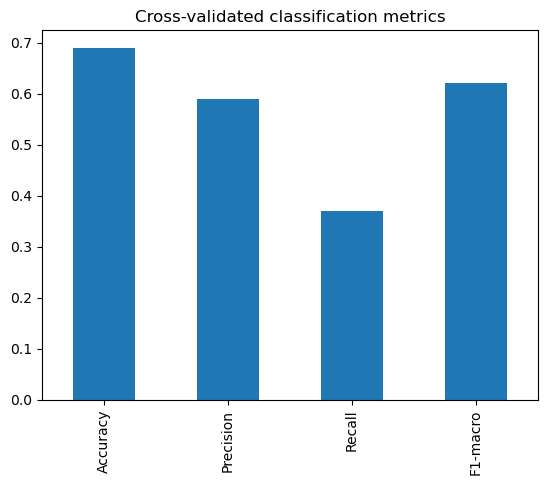

In [654]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": k_fold_logreg_accuracy.mean().round(2),
                           "Precision": k_fold_logreg_precision.mean().round(2),
                           "Recall": k_fold_logreg_recall.mean().round(2),
                           "F1-macro": k_fold_logreg_f1.mean().round(2)},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### **Hyperparameter Tuning with Grid Search**

**C (Regularization Strength):** This parameter controls the regularization applied to the logistic regression model.The range [0.01, 0.1, 1, 10, 100] covers both small and large values, so the grid search can explore how different levels of regularization affect the model's performance.

**solver:** This defines the algorithm used to optimize the logistic regression model. In this case:

  * **newton-cg:** A second-order optimization method (uses Hessian matrix).
  * **lbfgs:** A quasi-Newton optimization method, generally used for large datasets.
  * **liblinear:** A solver that is particularly efficient for small datasets or when the number of samples is smaller than the number of features.


* **GridSearchCV:** This is a method from sklearn.model_selection used to perform an exhaustive search over a specified hyperparameter grid. It uses cross-validation (10-fold in this case) to evaluate how each combination of hyperparameters performs.
  * **log_reg_grid:** The hyperparameters grid that GridSearchCV will use to tune the model.
  * **cv=10:** This specifies 10-fold cross-validation, meaning that the dataset will be split into 10 subsets (folds), and the model will be trained and evaluated 10 times, each time using a different fold as the test set and the remaining folds as the training set.
  * **scoring='f1_macro':** The performance metric to evaluate the models. The macro F1-score calculates the F1-score for each class and takes the unweighted average. It is appropriate when you have class imbalance, as it treats all classes equally.

In [672]:
# Tune LogisticRegression
log_reg_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers to try that are suitable for the binary classification
    'max_iter': [100, 200, 300]           # Number of iterations
}

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
logreg = LogisticRegression()

# Perform Grid Search with 10-fold cross-validation
gs_log_reg = GridSearchCV(logreg, log_reg_grid, cv=10, scoring='f1_macro')

#fit grid search cv
gs_log_reg.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1_macro')

**Interpretation**

* The F1 macro score is 0.6236, which indicates moderate performance. This score reflects how well the model performs across all classes without giving more weight to the majority class.
* After selecting the best model and hyperparameters, the model's F1-score on the test set is 0.590.
* The difference between the cross-validation score and the test score (about 0.03) is not huge, but it’s an indication that the model might be slightly overfitting or that the data in the test set is harder for the model to generalize on

In [674]:

# Get the best parameters and best score
print("Best Parameters using Grid Search: ", gs_log_reg.best_params_)
print("Best F1 Macro Score using Grid Search: ", gs_log_reg.best_score_)

# Evaluate the best model on the test set
top_model = gs_log_reg.best_estimator_
y_pred = top_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f'Test F1-score after Grid Search: {test_f1:.3f}')

Best Parameters using Grid Search:  {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
Best F1 Macro Score using Grid Search:  0.6235551011750701
Test F1-score after Grid Search: 0.590


### **Hyperparameter Tuning with Random Search**

* **Randomized Search** is an alternative to Grid Search, where instead of evaluating all possible hyperparameter combinations, it randomly selects combinations from specified distributions. 

* The best F1 macro score achieved during cross-validation was 0.6267.
  
* This score reflects the model's ability to balance precision and recall across all classes. A score of 0.6267 indicates moderate performance

* **Randomized Search** allowed us to explore a wider hyperparameter space more efficiently, and the results suggest that **regularization strength (C)**, **solver choice**, and the **number of iterations** are important factors for tuning the logistic regression modele.

* **test F1-score** of **0.590** indicates that there’s still potential to improve the model's generalization. Future steps might include:
   * Further model tuning.
    * Trying more sophisticated models (e.g., Random Forest, Gradient Boosting).
    * Investigating feature engineering or sampling techniques if data imbalance is present.



In [664]:
# Tune LogisticRegression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),        # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers to try that are suitable for the binary classification
    'max_iter': [100, 200, 300]           # Number of iterations
}


# Setup random hyperparameter search for LogisticRegression
logreg = LogisticRegression()


random_search = RandomizedSearchCV(logreg, log_reg_grid, n_iter=100, cv=10, scoring='f1_macro', random_state=42)

# Fit the random search
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters using Random Search : ", random_search.best_params_)
print("Best F1 Macro Score using Random Search: ", random_search.best_score_)

# Evaluate the best model on the test set
top_model = random_search.best_estimator_
y_pred = top_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f'Test F1-score after Random Search: {test_f1:.3f}')

Best Parameters using Random Search :  {'solver': 'lbfgs', 'max_iter': 200, 'C': 0.615848211066026}
Best F1 Macro Score using Random Search:  0.6267454257714207
Test F1-score after Random Search: 0.590


### Comparaison
* Both **Grid Search** and **Randomized Search+** performed similarly on the test set, with the main difference being in their computational efficiency and cross-validation performance.
*  **Randomized Search** is more efficient in terms of both time and resources while offering a comparable result in terms of model performance.
*  However, **Grid Search** may be more appropriate when you want to exhaustively test all hyperparameter combinations.

# Decision Tree

In [735]:
max_depth = range(1,20)

training_accuracy = []
test_accuracy = []
training_f1 = []
test_f1 = []

for depth in max_depth : 
    tree = DecisionTreeClassifier(random_state=42, max_depth=depth, min_samples_leaf=1).fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_pred = tree.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

### **Observations:**



* The gap between **training** and **testing** performance widens as **max_depth increases**, emphasizing the model's **inability to generalize.**

* For depths greater than 5, the training performance continues to improve, but the testing performance deteriorates, a classic sign of overfitting.

* Trying ensemble methods like Random Forest or Gradient Boosting, which are less prone to overfitting.
* Regularizing the tree with parameters like **min_samples_split** or **min_samples_leaf** or **max_features**

* **Optimal Depth:**

   * Both metrics (Accuracy and F1-Score) suggest that the optimal max_depth is around 3–5. At this depth, the model achieves a good balance between fitting the training data and generalizing to new data.
   * We set max_depth=4, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.


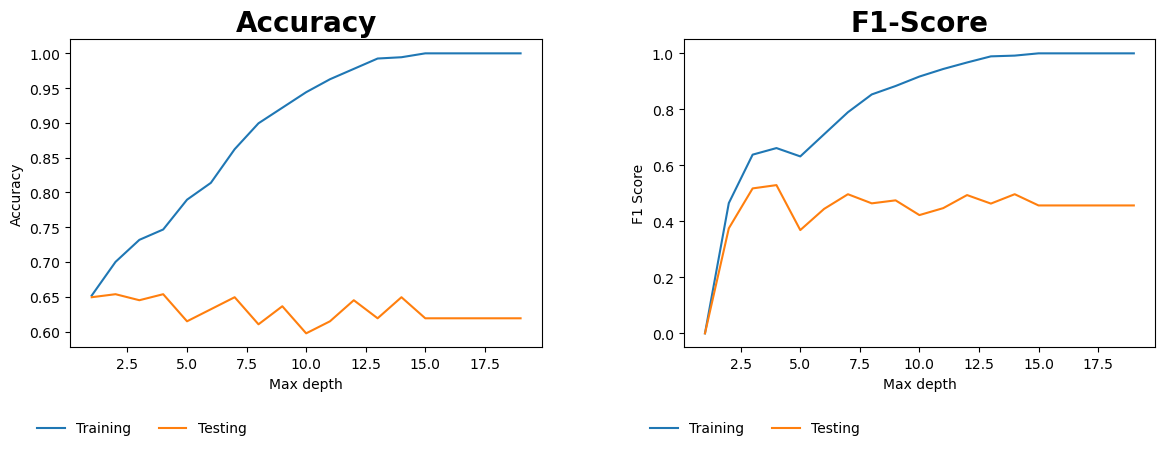

In [737]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

############################### Accuracy #############################""

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy)
plt.plot(max_depth, test_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Max depth')

plt.title('Accuracy',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);

###############################" F1-score#############################""
fig.add_subplot(2,2,2)
plt.plot(max_depth, training_f1)
plt.plot(max_depth, test_f1)
plt.ylabel('F1 Score')
plt.xlabel('Max depth')

plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);

In [758]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
y_pred=tree.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.654
F1-score on test set: 0.529


### Confusion Matrix

* The matrix represents the performance of our classifier.
* We can see that the model Correctly predicted the class 0 (negative)


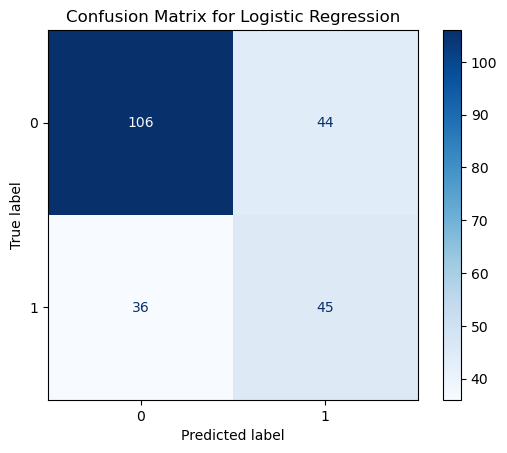

In [777]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

###  **Hyperparameter Tuning**

### **Grid Search**

**Grid Search Results**
 * Grid Search systematically explored all possible combinations of the provided hyperparameter grid. This exhaustive search ensures that the best possible parameters are identified within the defined search space.
 * the parameters seleccted helps prevent overfitting while maintaining a reasonable level of predictive accuracy.
 * An F1-Score of 0.6571 reflects a balanced model that performs reasonably well in distinguishing between classes

In [784]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [3, 4,5, 10, 15],
    'min_samples_split': [2, 5, 10,50,60],
    'min_samples_leaf': [1, 2, 4,5,10]
}


# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best F1-Score: 0.6571300805338327


### **Random Search**

* Random Search sampled the hyperparameter space randomly and still converged to the same optimal parameters as Grid Search
* With the same F1-Score of 0.6571, the results confirm that the chosen parameters balance precision and recall, **similar to the Grid Search**.

In [809]:


# Define hyperparameter grid
param_dist = {
     'criterion': ["gini", "entropy"],
    'max_depth': [int(x) for x in np.linspace(1, 20, 20)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform random search
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist, n_iter=50, cv=5, scoring='f1_macro', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)


Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 4, 'criterion': 'gini'}
Best F1-Score: 0.6571300805338327


In [811]:
best_params = {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}


optimial_tree = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

optimial_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)

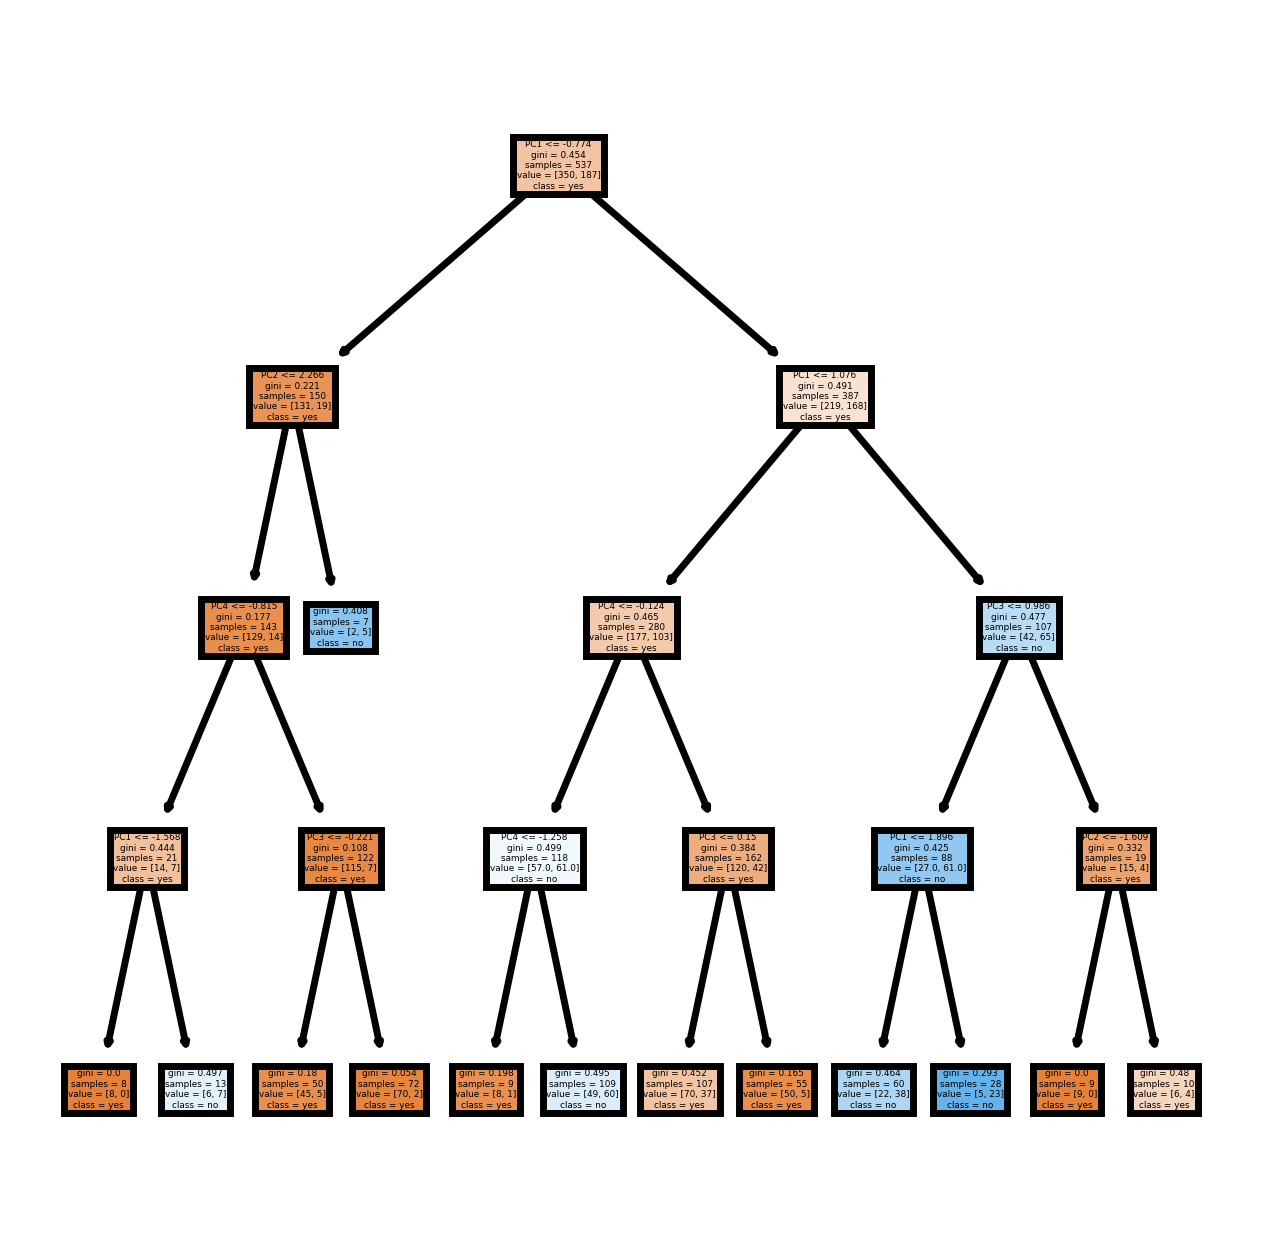

In [813]:
from sklearn.tree import plot_tree

fn=X_train.columns
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42).fit(X_train, y_train)
cn=["yes","no"] 

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(optimial_tree ,
           feature_names = fn, 
           class_names=cn,
           filled = True);

# **Random Forest**

In [864]:
# Train a basic Random Forest model
rf= RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)



* The model has an accuracy of 68%, meaning it correctly classifies 67.5% of the instances. However, accuracy can be misleading, especially in imbalanced datasets. the majority class (Outcome = 0) dominates the dataset, which means the model is achieving high accuracy by mostly predicting class 0.
* The model is good at predicting the majority class (class 0), but it struggles with the minority class (class 1). This is a common issue with imbalanced datasets.
* The low recall for class 1 indicates that many instances of the minority class are misclassified.
  
* Perform hyperparameter tuning (using GridSearchCV or RandomizedSearchCV) to improve model parameters and adjust the number of trees, maximum depth, etc

In [866]:
# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')


# Print results
print("Accuracy of Random Forest:", round(accuracy, 3))
print("F1-Score (Macro) of Random Forest:", round(f1_macro, 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest: 0.675
F1-Score (Macro) of Random Forest: 0.629

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       150
           1       0.54      0.46      0.50        81

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.68      0.67       231



**Confusion Matrix**

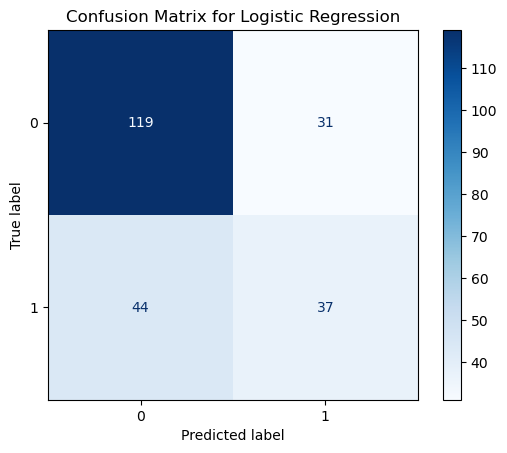

In [828]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### **Hyperparameter Tuning**

### **Grid Search**

* The trees in the forest are not too deep (max_depth = 6), which is a reasonable choice to avoid overfitting.
* 50 trees (n_estimators = 50) is a decent number, enough to make the Random Forest model stable and robust
* the F1 Macro Score of 0.6486 suggests that the model does an acceptable job of balancing precision and recall for both classes

### **Random Search**

Random Search seems to have slightly outperformed Grid Search in this case, with a higher test F1-Score (0.628) and similar results in terms of the macro F1 score

In [855]:
rf_random_grid = {
    'n_estimators': np.arange(50, 201, 50),  
    'max_depth': np.arange(4, 10, 2),        
    'min_samples_split': np.arange(2, 11, 3),  
    'min_samples_leaf': np.arange(1, 5)     
}

# Randomized Search CV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_random_grid, n_iter=100, cv=10, scoring='f1_macro', random_state=42)
random_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters (Random Search):", random_search_rf.best_params_)
print("Best F1 Macro Score (Random Search):", random_search_rf.best_score_)

# Test the best model
best_rf_random_model = random_search_rf.best_estimator_
y_pred_random_best = best_rf_random_model.predict(X_test)
test_f1_random = f1_score(y_test, y_pred_random_best, average='macro')
print(f"Test F1-Score after Random Search: {test_f1_random:.3f}")

Best Parameters (Random Search): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6}
Best F1 Macro Score (Random Search): 0.6454125208046773
Test F1-Score after Random Search: 0.628


### **Stratified KFold***

* StratifiedKFold ensures that each fold used for training and testing has the same distribution of the target classes
* The Random Forest model with the specified hyperparameters performs fairly consistently, with a good balance between precision and recall, as indicated by the F1 macro score.
*  The low standard deviation implies that the model's performance is stable across different subsets of the data.

In [902]:

best_rf_model = grid_search_rf.best_estimator_


# Using Stratified KFold to ensure each fold has a proportional distribution of the target classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='f1_macro')

# Print cross-validation results
print("F1 Macro Scores from Cross-Validation:", cv_scores)
print("Mean F1 Macro Score:", np.mean(cv_scores))
print("Standard Deviation of F1 Macro Scores:", np.std(cv_scores))

F1 Macro Scores from Cross-Validation: [0.66700925 0.56153846 0.71081081 0.6688771  0.66031746]
Mean F1 Macro Score: 0.6537106164642756
Standard Deviation of F1 Macro Scores: 0.04940984636896139


# Outlier Observation Analysis

In [296]:
def outlier_thresholds(df, feature):
    # In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
    # It was found to be an outlier observation.

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    return lower, upper
    


def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    has_outliers = dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None)
    if has_outliers:
        print(variable, "yes")
    else:
        print(variable, "no")

for col in diab_data.columns:
    has_outliers(diab_data, col)

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [300]:
def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit


def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False



def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

for col in diab_data.columns:
  print(col, check_outlier(diab_data, col))
  #if check_outlier(diab_data, col):
    #replace_with_thresholds(df, col)

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


**Visualization of the outliers for each column**

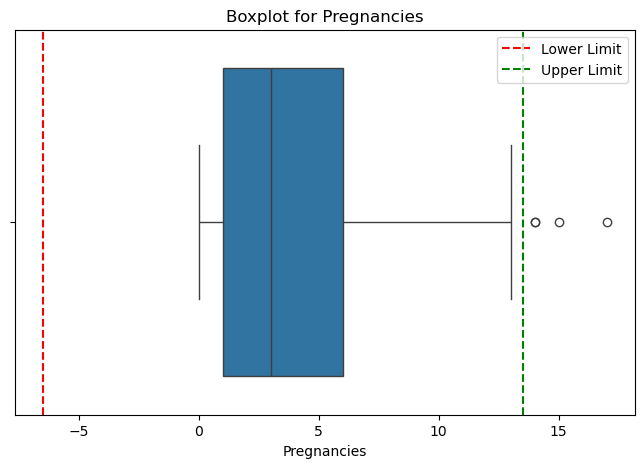

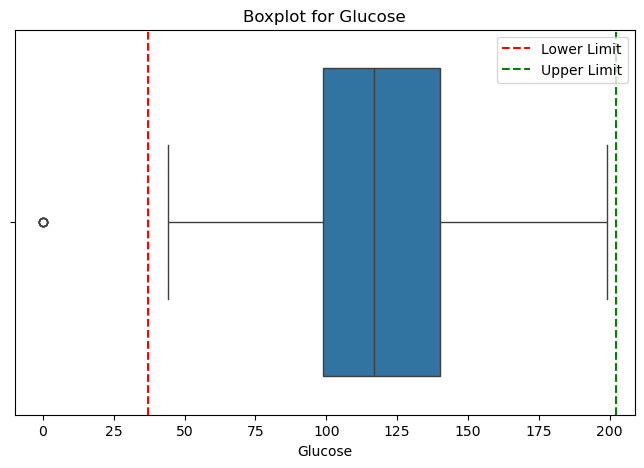

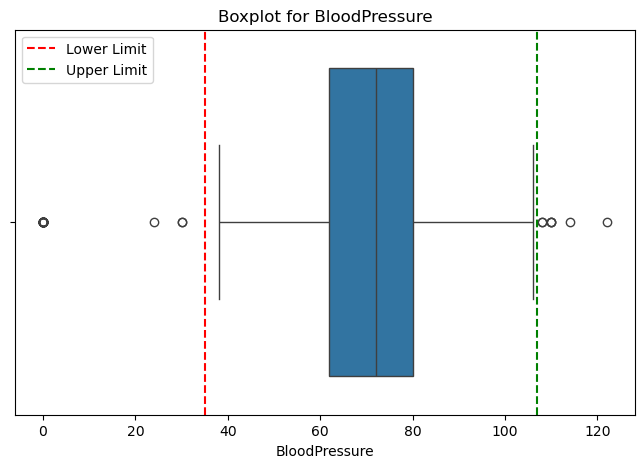

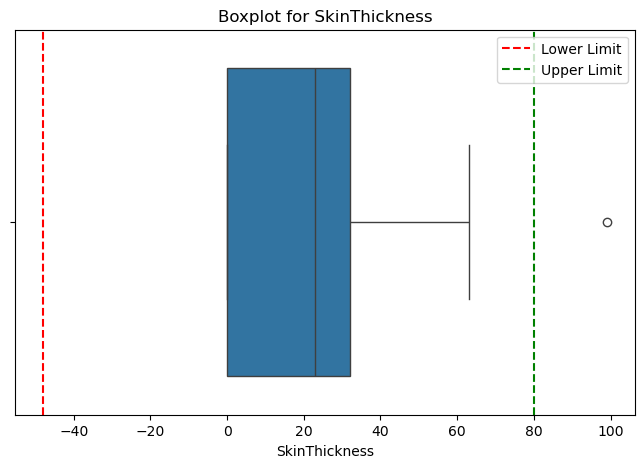

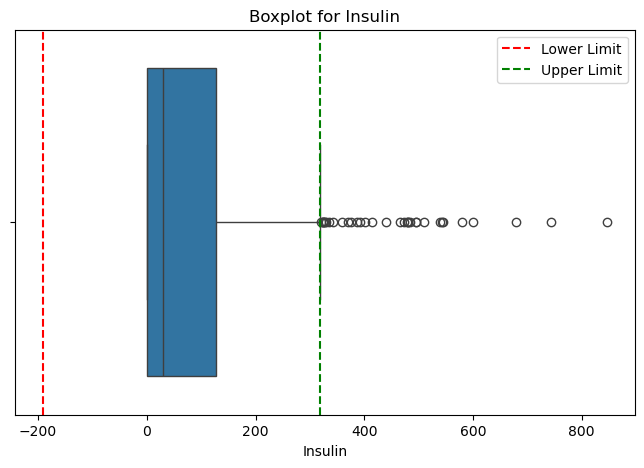

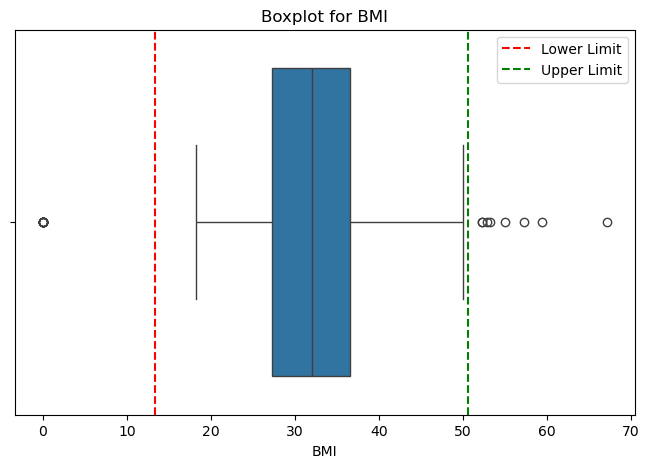

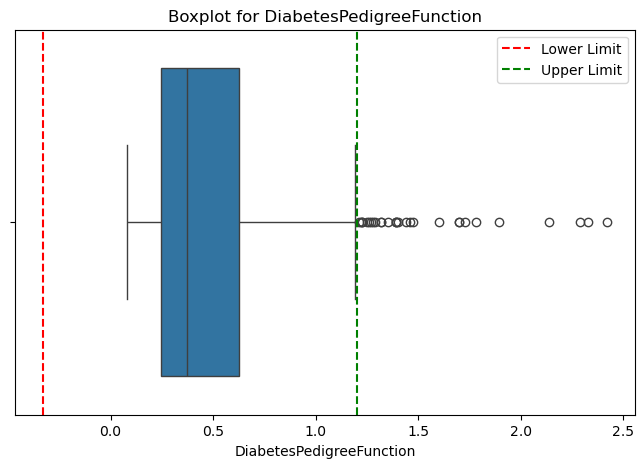

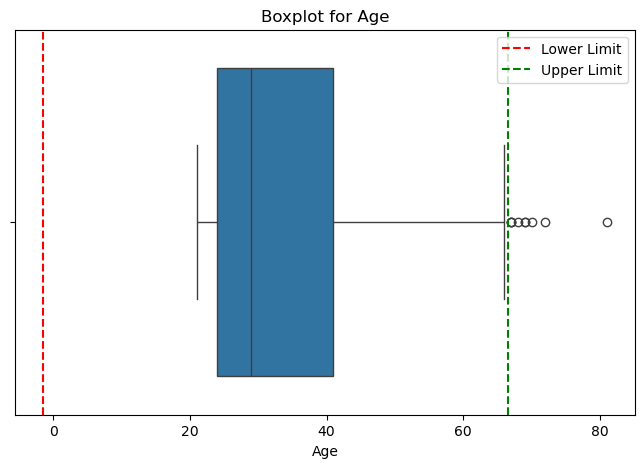

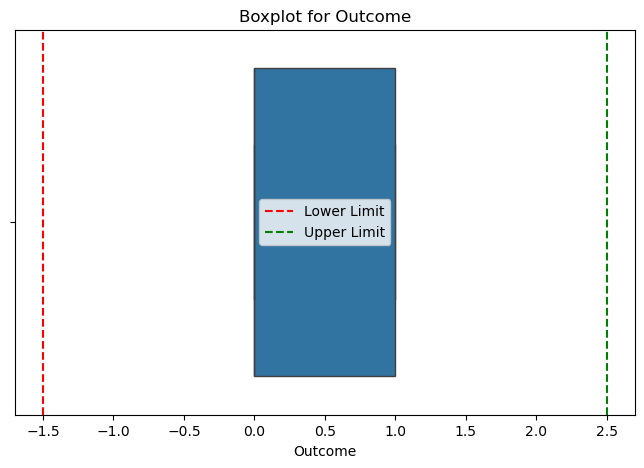

In [82]:
for col in diab_data.columns:

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=diab_data[col])
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    
    # Calculer les limites des outliers
    low_limit, up_limit = outlier_thresholds(diab_data, col)
    plt.axvline(low_limit, color='red', linestyle='--', label='Lower Limit')  # Limite inférieure
    plt.axvline(up_limit, color='green', linestyle='--', label='Upper Limit')  # Limite supérieure
    plt.legend()  # Afficher la légende
    plt.show()

In [101]:
def count_outliers(data):
    outlier_counts = {}
    for col in data.select_dtypes(include=['float', 'int']).columns:  # Process only numeric columns
        low_limit, up_limit = outlier_thresholds(data, col)

        outliers_below = (data[col] < low_limit).sum()
        outliers_above = (data[col] > up_limit).sum()
        total_outliers = outliers_below + outliers_above

        # Save counts to a dictionary
        outlier_counts[col] = {
            'Below Lower Bound': outliers_below,
            'Above Upper Bound': outliers_above,
            'Total Outliers': total_outliers
        }
    return outlier_counts

# Call the function and store results
outliers_summary = count_outliers(diab_data)

# Display results
import pandas as pd
outliers_df = pd.DataFrame(outliers_summary).T  # Convert dictionary to DataFrame for better visualization
print(outliers_df)



                          Below Lower Bound  Above Upper Bound  Total Outliers
Pregnancies                               0                  4               4
Glucose                                   5                  0               5
BloodPressure                            38                  7              45
SkinThickness                             0                  1               1
Insulin                                   0                 34              34
BMI                                      11                  8              19
DiabetesPedigreeFunction                  0                 29              29
Age                                       0                  9               9
Outcome                                   0                  0               0


**Rejection of the outliers**

In [107]:
def remove_outliers(df):
   
    for col in df.columns:
        low_limit, up_limit = outlier_thresholds(df, col)

        
        # Remove outliers
        df = df[(df[col] >= low_limit) & (df[col] <= up_limit)]
        
    return df


In [109]:
diab_data_cleaned = remove_outliers(diab_data)

In [131]:
print("shape of data before outliers rejection:",diab_data.shape)
print("shape of data after outliers rejection:",diab_data_cleaned.shape)


shape of data before outliers rejection: (768, 9)
shape of data after outliers rejection: (636, 9)


**Outlier Analysis and Treatment**
- **Method Used**: IQR (Interquartile Range) method.
- **Columns Analyzed**: All numerical columns.
- **Summary**:
  - Detected outliers in 7 columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, and DiabetesPedigreeFunction.
  - Total rows with outliers removed: X rows.

- **Treatment**:
  - Outliers were capped at the IQR bounds for Pregnancies, Glucose, and Insulin, as these variables are critical for model performance.
  - Outliers in SkinThickness and DiabetesPedigreeFunction were removed, as they appeared to be measurement errors.
  - BloodPressure outliers were retained, as extreme blood pressure values could indicate health risks.

# Features Selection

In [288]:
print(diab_data['Outcome'].value_counts(normalize=True))


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [ ]:
e']
